In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = "/bin/python3"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.appName('Credit Card').getOrCreate()

In [3]:
spark

In [4]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Reading credit record

credit_record = pd.read_csv('https://s3.amazonaws.com/sqoop.oozie.ml/credit_record.csv')

In [8]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [9]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [10]:
credit_record.shape

(1048575, 3)

In [11]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [12]:
credit_record[credit_record.ID == 5001711].count()

ID                4
MONTHS_BALANCE    4
STATUS            4
dtype: int64

In [13]:
credit_record[credit_record.ID == 5001712].count()

ID                19
MONTHS_BALANCE    19
STATUS            19
dtype: int64

In [14]:
len(credit_record.ID.unique())

45985

In [15]:
l1 = credit_record.ID.unique()
l1

array([5001711, 5001712, 5001713, ..., 5150484, 5150485, 5150487])

In [16]:
#Updating the labels as 0 & 1 as per the status

data = []
for id in l1:
    df = credit_record[credit_record.ID == id]
    mths = df.shape[0]
    statustobechecked = ['2', '3', '4', '5']
    if any (status in list(df.STATUS) for status in statustobechecked):
        label = 1
    else:
        label = 0
    data.append((id, mths, label))

In [17]:
data

[(5001711, 4, 0),
 (5001712, 19, 0),
 (5001713, 22, 0),
 (5001714, 15, 0),
 (5001715, 60, 0),
 (5001717, 22, 0),
 (5001718, 39, 0),
 (5001719, 43, 0),
 (5001720, 36, 0),
 (5001723, 31, 0),
 (5001724, 31, 0),
 (5001725, 8, 0),
 (5001726, 39, 0),
 (5001728, 1, 0),
 (5001729, 7, 0),
 (5001730, 61, 0),
 (5001731, 11, 0),
 (5001732, 36, 0),
 (5001733, 11, 0),
 (5001734, 3, 0),
 (5001735, 24, 0),
 (5001736, 24, 0),
 (5001737, 22, 0),
 (5001738, 44, 0),
 (5001739, 58, 0),
 (5001742, 47, 0),
 (5001743, 41, 0),
 (5001744, 29, 0),
 (5001745, 11, 0),
 (5001746, 12, 0),
 (5001747, 28, 0),
 (5001748, 34, 0),
 (5001754, 12, 0),
 (5001755, 11, 0),
 (5001756, 19, 0),
 (5001757, 21, 0),
 (5001758, 47, 0),
 (5001759, 20, 0),
 (5001760, 30, 0),
 (5001765, 32, 0),
 (5001766, 26, 0),
 (5001767, 15, 0),
 (5001768, 8, 0),
 (5001769, 17, 0),
 (5001770, 17, 0),
 (5001771, 15, 0),
 (5001772, 23, 0),
 (5001773, 24, 0),
 (5001774, 27, 0),
 (5001775, 33, 0),
 (5001778, 36, 0),
 (5001779, 46, 0),
 (5001780, 46, 0),

In [18]:
credit_update = pd.DataFrame(data, columns = ['ID', 'RELATIONSHIP_DUR', 'LABEL'])
credit_update.reset_index(drop = True)

,ID,RELATIONSHIP_DUR,LABEL
0,5001711,4,0
1,5001712,19,0
2,5001713,22,0
3,5001714,15,0
4,5001715,60,0
...,...,...,...
45980,5150482,18,0
45981,5150483,18,0
45982,5150484,13,0
45983,5150485,2,0


In [19]:
credit_update.shape

(45985, 3)

In [20]:
#Reading the application record

appln_record = pd.read_csv('https://s3.amazonaws.com/sqoop.oozie.ml/application_record.csv')

In [21]:
appln_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [22]:
appln_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [23]:
appln_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [24]:
appln_record.OCCUPATION_TYPE.value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
#Replacing the null occupation cells with the name Othercategory

appln_record.OCCUPATION_TYPE = appln_record.OCCUPATION_TYPE.fillna(value = 'Othercategory')

In [26]:
appln_record.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [27]:
appln_record.shape

(438557, 18)

In [28]:
appln_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [29]:
#Converting days_birth & days_employed from -ve to +ve and converting them from days to years

appln_record['DAYS_BIRTH_YRS'] = abs(appln_record['DAYS_BIRTH']/365)
appln_record['DAYS_EMPLOYED_YRS'] = abs(appln_record['DAYS_EMPLOYED']/365)

In [30]:
appln_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465,43.829876,177.832001
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207,11.465836,374.765309
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,20.517808,0.032877
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000,34.284932,2.994521
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000,42.821918,6.884932
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000,53.378082,16.024658
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,69.043836,1000.665753


In [31]:
appln_record.DAYS_BIRTH_YRS.describe()

count    438557.000000
mean         43.829876
std          11.465836
min          20.517808
25%          34.284932
50%          42.821918
75%          53.378082
max          69.043836
Name: DAYS_BIRTH_YRS, dtype: float64

In [32]:
appln_record.DAYS_EMPLOYED_YRS.describe()

count    438557.000000
mean        177.832001
std         374.765309
min           0.032877
25%           2.994521
50%           6.884932
75%          16.024658
max        1000.665753
Name: DAYS_EMPLOYED_YRS, dtype: float64

In [33]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [34]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [35]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
from tabulate import tabulate
from pyspark.sql import *

<AxesSubplot:>

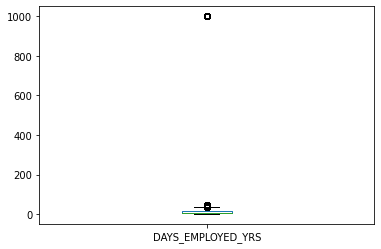

In [37]:
#Seeing significant outliers from the plot box

appln_record.DAYS_EMPLOYED_YRS.plot.box()

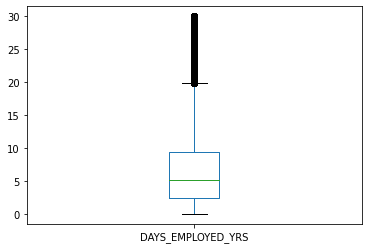

In [38]:
appln_record[appln_record.DAYS_EMPLOYED_YRS<30].DAYS_EMPLOYED_YRS.plot.box()
plt.show()

In [39]:
#In view of outliers, have considered 30 years as the employment duration and limiting the applicants accordingly

appln_record1 = appln_record[appln_record.DAYS_EMPLOYED_YRS<=30]

In [40]:
#1. What is the proportion of females in the applicant customer base?
appln_record1.CODE_GENDER.value_counts()['F']/appln_record1.CODE_GENDER.value_counts().sum()

0.6330745034450286

In [41]:
appln_record1.DAYS_EMPLOYED_YRS.describe()

count    358923.000000
mean          6.861723
std           5.891172
min           0.032877
25%           2.473973
50%           5.197260
75%           9.419178
max          29.997260
Name: DAYS_EMPLOYED_YRS, dtype: float64

In [42]:
#Creating a new DF by merging application record and credit update DFs

new_df = appln_record1.merge(credit_update, on = 'ID', how = 'inner')

In [43]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_YRS,DAYS_EMPLOYED_YRS,RELATIONSHIP_DUR,LABEL
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Othercategory,2.0,32.890411,12.443836,16,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Othercategory,2.0,32.890411,12.443836,15,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58.832877,3.106849,30,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.356164,8.358904,5,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52.356164,8.358904,5,0


In [44]:
#2. Is homeownership higher among male applicants or female applicants?
new_df.groupby(['FLAG_OWN_REALTY'])['CODE_GENDER'].value_counts()
#from the output, we can learn that female applicants have the highest home ownership

FLAG_OWN_REALTY  CODE_GENDER
N                F               6325
                 M               4112
Y                F              12593
                 M               6983
Name: CODE_GENDER, dtype: int64

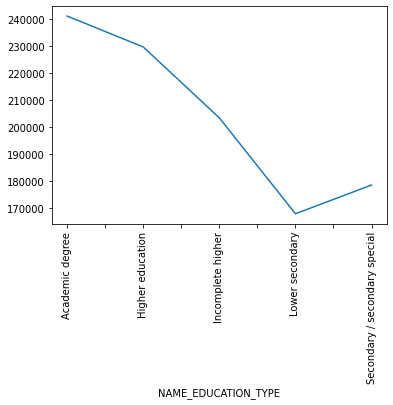

In [45]:
#3. Is there any correlation between the customer's income level and education level?
#df_new4.groupby(['MonthYear'])['Tag'].count().plot()

new_df.groupby(['NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot()
plt.xticks(rotation= 90)
plt.show()

#from the output, we can understand that there's correlation between customer's income level and education level.

In [46]:
new_df.LABEL.value_counts()

0    29513
1      500
Name: LABEL, dtype: int64

In [47]:
#4. What is the average and median salary of the applicant base?
new_df.AMT_INCOME_TOTAL.mean()
#the average salary of the applicant base is 194482

194482.66187985206

In [48]:
#4. What is the average and median salary of the applicant base?
new_df.AMT_INCOME_TOTAL.median()
#the median salary of the applicant base is 180000

180000.0

In [49]:
#5. Is the proportion of bad customers higher for people who own cars?
new_df.groupby(['FLAG_OWN_CAR'])['LABEL'].value_counts()
# from the output, we can observe that the proportion of bad customers who own cars is same as the proportion of bad customers who doesnt own cars

FLAG_OWN_CAR  LABEL
N             0        17235
              1          293
Y             0        12278
              1          207
Name: LABEL, dtype: int64

In [50]:
#6. Is the proportion of bad customers higher for those living on rent than the rest of the population?
new_df.groupby(['FLAG_OWN_REALTY'])['LABEL'].value_counts()
#from the output, we can observe that the proportion of bad customer is higher for those living on rent that the rest of the population

FLAG_OWN_REALTY  LABEL
N                0        10229
                 1          208
Y                0        19284
                 1          292
Name: LABEL, dtype: int64

In [51]:
#7. Is the proportion of bad customers higher for those who are single than married customers?
new_df.groupby(['NAME_FAMILY_STATUS'])['LABEL'].value_counts()
#from the output, we can observe that the proportion of bad customer is higher for those who are single than married

NAME_FAMILY_STATUS    LABEL
Civil marriage        0         2533
                      1           42
Married               0        20608
                      1          332
Separated             0         1699
                      1           19
Single / not married  0         4004
                      1           91
Widow                 0          669
                      1           16
Name: LABEL, dtype: int64

In [52]:
!pip3 install xverse

Defaulting to user installation because normal site-packages is not writeable


In [53]:
#Leveraging xverse to calculate WOE & IV values
from xverse.transformer import MonotonicBinning
X1=new_df.drop(['LABEL','ID'], axis =1)
Y= new_df.LABEL
clf=MonotonicBinning()
clf.fit(X1,Y)
print(clf.bins)
output_bins=clf.bins

{'CNT_CHILDREN': array([ 0.,  1., 19.]), 'AMT_INCOME_TOTAL': array([  27000.,  135000.,  211500., 1575000.]), 'DAYS_BIRTH': array([-24611., -16277., -12783.,  -7489.]), 'DAYS_EMPLOYED': array([-10936.,  -2901.,  -1281.,    -17.]), 'FLAG_MOBIL': array([1.]), 'FLAG_WORK_PHONE': array([0., 1.]), 'FLAG_PHONE': array([0., 1.]), 'FLAG_EMAIL': array([0., 1.]), 'CNT_FAM_MEMBERS': array([ 1.,  2., 20.]), 'DAYS_BIRTH_YRS': array([20.51780822, 35.02191781, 44.59452055, 67.42739726]), 'DAYS_EMPLOYED_YRS': array([ 0.04657534,  3.50958904,  7.94794521, 29.96164384]), 'RELATIONSHIP_DUR': array([ 1., 12., 26., 61.])}


In [54]:
#Importing WOE
from xverse.transformer import WOE
clf = WOE()
clf.fit(X1, Y)

WOE(mono_custom_binning={'AMT_INCOME_TOTAL': array([  27000.,  135000.,  211500., 1575000.]),
                         'CNT_CHILDREN': array([ 0.,  1., 19.]),
                         'CNT_FAM_MEMBERS': array([ 1.,  2., 20.]),
                         'DAYS_BIRTH': array([-24611., -16277., -12783.,  -7489.]),
                         'DAYS_BIRTH_YRS': array([20.51780822, 35.02191781, 44.59452055, 67.42739726]),
                         'DAYS_EMPLOYED': array([-10936.,  -2901.,  -1281.,    -17.]),
                         'DAYS_EMPLOYED_...
                                  'Realty agents': 0.0,
                                  'Sales staff': -0.2545081643119426,
                                  'Secretaries': -0.23282110058371092,
                                  'Security staff': 0.28162490469034435,
                                  'Waiters/barmen staff': -0.37636927145170485},
              'RELATIONSHIP_DUR': {Interval(0.999, 12.0, closed='right'): -0.9483784519803309,
        

In [55]:
#WOE calculation
clf.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,AMT_INCOME_TOTAL,"(26999.999, 135000.0]",10861,183,10678,0.016849,0.983151,0.366,0.361807,0.011523,0.000186
1,AMT_INCOME_TOTAL,"(135000.0, 211500.0]",9186,150,9036,0.016329,0.983671,0.300,0.306170,-0.020359,0.000186
2,AMT_INCOME_TOTAL,"(211500.0, 1575000.0]",9966,167,9799,0.016757,0.983243,0.334,0.332023,0.005936,0.000186
3,CNT_CHILDREN,"(-0.001, 1.0]",26315,435,25880,0.016530,0.983470,0.870,0.876902,-0.007902,0.000431
4,CNT_CHILDREN,"(1.0, 19.0]",3698,65,3633,0.017577,0.982423,0.130,0.123098,0.054551,0.000431
...,...,...,...,...,...,...,...,...,...,...,...
70,OCCUPATION_TYPE,Security staff,592,13,579,0.021959,0.978041,0.026,0.019618,0.281625,0.072388
71,OCCUPATION_TYPE,Waiters/barmen staff,174,2,172,0.011494,0.988506,0.004,0.005828,-0.376369,0.072388
72,RELATIONSHIP_DUR,"(0.999, 12.0]",10583,69,10514,0.006520,0.993480,0.138,0.356250,-0.948378,0.448451
73,RELATIONSHIP_DUR,"(12.0, 26.0]",9733,117,9616,0.012021,0.987979,0.234,0.325823,-0.331032,0.448451


In [56]:
#IV calculation
clf.iv_df

,Variable_Name,Information_Value
19,RELATIONSHIP_DUR,0.448451
18,OCCUPATION_TYPE,0.072388
6,DAYS_EMPLOYED,0.036322
7,DAYS_EMPLOYED_YRS,0.035696
15,NAME_FAMILY_STATUS,0.026721
11,FLAG_OWN_REALTY,0.020463
3,CODE_GENDER,0.020102
4,DAYS_BIRTH,0.014812
5,DAYS_BIRTH_YRS,0.014799
14,NAME_EDUCATION_TYPE,0.014489


In [57]:
#Defining categorical & numerical columns
categorical_all = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL', 'OCCUPATION_TYPE'] 
numerical_all = ['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'RELATIONSHIP_DUR', 'DAYS_BIRTH_YRS', 'DAYS_EMPLOYED_YRS']

In [58]:
#Calculating Train and Test values
new_df1 = spark.createDataFrame(new_df)
train = new_df1.sampleBy("LABEL", fractions={0: 0.7, 1: 0.7}, seed=2018)
# Subtracting 'train' from original 'data' to get test set 
test = new_df1.subtract(train)

In [59]:
new_df1.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------------------+------------------+----------------+-----+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|    DAYS_BIRTH_YRS| DAYS_EMPLOYED_YRS|RELATIONSHIP_DUR|LABEL|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------------------+------------------+----------------+-----+
|5008804|    

In [60]:
from pyspark.ml.feature import StringIndexer

In [61]:
#Using StringIndexer

stringCols = categorical_all
newCols = []
for c in stringCols:
    si = StringIndexer(inputCol= c, outputCol= c + '_ix')
    train = si.fit(train).transform(train)
    test = si.fit(test).transform(test)
    newCols.append(c + '_ix')

In [62]:
newCols

['CODE_GENDER_ix',
 'FLAG_OWN_CAR_ix',
 'FLAG_OWN_REALTY_ix',
 'NAME_INCOME_TYPE_ix',
 'NAME_EDUCATION_TYPE_ix',
 'NAME_FAMILY_STATUS_ix',
 'NAME_HOUSING_TYPE_ix',
 'FLAG_WORK_PHONE_ix',
 'FLAG_PHONE_ix',
 'FLAG_EMAIL_ix',
 'OCCUPATION_TYPE_ix']

In [63]:
from pyspark.ml.feature import OneHotEncoderEstimator

In [64]:
#OneHotEncoderEstimation calcuation

ohe = OneHotEncoderEstimator(inputCols=newCols, outputCols=[c+'Enc' for c in newCols])
train = ohe.fit(train).transform(train)
test = ohe.fit(test).transform(test)

In [65]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [66]:
#Using VectorAssembler 

trainCols = [c+'Enc' for c in newCols] + numerical_all
assembler = VectorAssembler(inputCols=trainCols, outputCol="features1")
train = assembler.transform(train)
test = assembler.transform(test)

In [67]:
#Logistic Regression Model Building

lr=LogisticRegression(featuresCol='features1', labelCol='LABEL')
model=lr.fit(train)
result=model.evaluate(test)

In [68]:
#Accuracy calculation

result.accuracy

0.9835631549917264

In [69]:
#Area Under ROC calculation

result.areaUnderROC

0.7450556264097276

In [70]:
#Recall value calculation

result.recallByLabel

[1.0, 0.06289308176100629]

In [71]:
#Precision value calculation

result.precisionByLabel

[0.9835450027609056, 1.0]

In [72]:
#fMeasure calculation

result.fMeasureByLabel()

[0.9917042480930907, 0.1183431952662722]

In [73]:
#Based on the IV values calculated, we've identified that some of the features have IV values less than 0.002.  Hence dropping them and retaining the remaining ones

categorical_all_new = ['CODE_GENDER','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'RELATIONSHIP_DUR','OCCUPATION_TYPE'] 
numerical_all_new = ['DAYS_BIRTH_YRS', 'DAYS_EMPLOYED_YRS']

In [74]:
#Using StringIndexer

stringCols = categorical_all_new
newCols = []
for c in stringCols:
    si = StringIndexer(inputCol= c, outputCol= c + '_ix1')
    new_df1 = si.fit(new_df1).transform(new_df1)
    newCols.append(c + '_ix1')

In [75]:
newCols

['CODE_GENDER_ix1',
 'FLAG_OWN_REALTY_ix1',
 'NAME_INCOME_TYPE_ix1',
 'NAME_EDUCATION_TYPE_ix1',
 'NAME_FAMILY_STATUS_ix1',
 'NAME_HOUSING_TYPE_ix1',
 'FLAG_WORK_PHONE_ix1',
 'RELATIONSHIP_DUR_ix1',
 'OCCUPATION_TYPE_ix1']

In [76]:
#OneHotEncoderEstimation calcuation

ohe = OneHotEncoderEstimator(inputCols=newCols, outputCols=[c+'Enc' for c in newCols])
new_df1 = ohe.fit(new_df1).transform(new_df1)

In [77]:
#Using VectorAssembler 

trainCols = [c+'Enc' for c in newCols] + numerical_all_new
assembler = VectorAssembler(inputCols=trainCols, outputCol="features")
new_df1 = assembler.transform(new_df1)

In [78]:
#Logistic Regression Model Building

lr=LogisticRegression(featuresCol='features', labelCol='LABEL')
model=lr.fit(new_df1)
result=model.evaluate(new_df1)

In [79]:
#Accuracy value calculation

result.accuracy

0.983906973644754

In [80]:
#Area under ROC calculation

result.areaUnderROC

0.7696313488970963

In [81]:
#Recall value calculation

result.recallByLabel

[1.0, 0.034]

In [82]:
#Precision value calculation

result.precisionByLabel

[0.9838978530470729, 1.0]

In [83]:
#fMeasure value calculation

result.fMeasureByLabel()

[0.9918835806348619, 0.06576402321083172]